In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
import textwrap

In [3]:
# groups
all_sce=[
     "stick_20240822_80p", "crt2030_80p_nl_0821","crt2040_80p_nl_0821",
  "crt2030_80p_l_0821",
    "crt2040_80p_l_0821",
    "stick_20240822_60p", "crt2030_60p_nl_0821","crt2040_60p_nl_0821","crt2030_60p_l_0821","crt2040_60p_l_0821",
  "stick_20240822_100p", "crt2030_100p_nl_0821","crt2040_100p_nl_0821","crt2030_100p_l_0821","crt2040_100p_l_0821",
    "stick_0821_80p_lowGDPlowPop", "crt2030_80p_nl_0821_lowGDPlowPop","crt2040_80p_nl_0821_lowGDPlowPop","crt2030_80p_l_0821_lowGDPlowPop","crt2040_80p_l_0821_lowGDPlowPop",
  
    "stick_0821_80p_highGDPhighPop",  "crt2030_80p_nl_0821_highGDPhighPop","crt2040_80p_nl_0821_highGDPhighPop","crt2030_80p_l_0821_highGDPhighPop","crt2040_80p_l_0821_highGDPhighPop",
  "stick_20240822_80p","crt2030_80p_nl_0821","crt2040_80p_nl_0821","crt2030_80p_l_0821_et","crt2040_80p_l_0821_et",
    "stick_20240822_80p","crt2030_80p_nl_0821","crt2040_80p_nl_0821","crt2030_80p_l_0821_nt","crt2040_80p_l_0821_nt",
    "stick_20240822_80p","crt2030_80p_nl_0821","crt2040_80p_nl_0821","crt2030_80p_l_0821_midLearning","crt2040_80p_l_0821_midLearning",
 "stick_20240822_80p_lowCDR_lowBio", "crt2030_80p_nl_0821_lowCDR_lowBio","crt2040_80p_nl_0821_lowCDR_lowBio","crt2030_80p_l_0821_lowCDR_lowBio","crt2040_80p_l_0821_lowCDR_lowBio",
        "stick_20240822_80p", "crt2030_80p_nl_0821_likeBEV2","crt2040_80p_nl_0821_likeBEV2","crt2030_80p_l_0821_likeBEV2","crt2040_80p_l_0821_likeBEV2",
  "stick_20240822_80p","crt2030_80p_nl_0821_hateBEV2","crt2040_80p_nl_0821_hateBEV2","crt2030_80p_l_0821_hateBEV2","crt2040_80p_l_0821_hateBEV2"
  
]

In [4]:
Price_CO2_df = pd.DataFrame()
Price_CO2_df['scenario']=all_sce
price_list = []
    

for sce in all_sce:
    file_name = "CO2_prices_1007_" + sce + ".csv"  
    df_price = pd.read_csv(file_name) 
    filtered_df = df_price[(df_price['market'] == 'USACO2') & (df_price['year'] == 2050) & (df_price['scenario'] == sce)]

    if not filtered_df.empty:
        price_2050 = filtered_df['value'].values[0]  
    else:
        price_2050 = None  
        print("DANGER!")


    price_list.append(price_2050)

Price_CO2_df["Price2050_ori"] = price_list
Price_CO2_df['Price_plot'] = Price_CO2_df['Price2050_ori']*12/44*1.98


#print(Price_CO2_df)

In [5]:
pricesS=[]
useX=[1,3,4, 6,7, 9,10,11, 12, 14, 15]
Diff1=[]
Diff2=[]
Diff3=[]
Diff4=[]

for i in range(0,11):
    priceS=price_list[(5*i)]
    price40nl=price_list[(5*i+2)]
    price30l=price_list[(5*i+3)]
    
    price40l=price_list[(5*i+4)]
    price30nl=price_list[(5*i+1)]
    
    diff1=(price40nl-priceS)/priceS
    diff2=(price30l - priceS)/priceS
    
    diff3=(price40l-priceS)/priceS
    diff4=(price30nl - priceS)/priceS
    
    Diff1.append(diff1)
    Diff2.append(diff2)
    Diff3.append(diff3)
    Diff4.append(diff4)

In [6]:
print(len(Diff1), len(Diff2), len(useX))

11 11 11


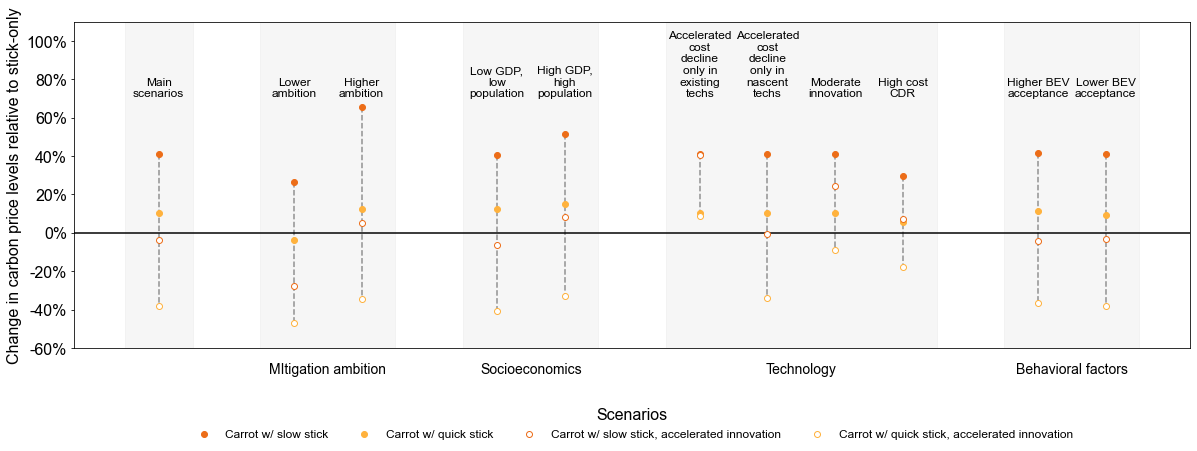

In [8]:

plt.figure(figsize=(20, 6))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 16

plt.scatter(useX, Diff1, marker='o', label='Carrot w/ slow stick', color = "#EC6D18", zorder =5)
plt.scatter(useX, Diff4, marker='o', label='Carrot w/ quick stick', color = "#FFB23D", zorder = 5)
plt.scatter(useX, Diff3, marker='o', label='Carrot w/ slow stick, accelerated innovation', color = "#EC6D18", facecolors="white", zorder =5)
plt.scatter(useX, Diff2, marker='o', label='Carrot w/ quick stick, accelerated innovation', color = "#FFB23D",  facecolors="white",zorder = 5)


for i in range(len(useX)):
    plt.vlines(x=useX[i], ymin=Diff1[i], ymax=Diff2[i], color='gray', linestyle='dashed', zorder =1)
plt.axhline(y=0, color = "black")


scenario_names = ['Main scenarios', 'Lower ambition', 'Higher ambition', 
                  'Low GDP, low population', 'High GDP, high population', 
                  'Accelerated cost decline only in existing techs', 'Accelerated cost decline only in nascent techs', 
                  'Moderate innovation',
                 'High cost CDR',
                 "Higher BEV acceptance",
                  "Lower BEV acceptance"
                 ]
plt.axvspan(0.5, 1.5, color='#D3D3D3', alpha=0.2) 
plt.axvspan(2.5, 4.5, color='#D3D3D3', alpha=0.2) 
plt.axvspan(5.5, 7.5, color='#D3D3D3', alpha=0.2) 
plt.axvspan(8.5, 12.5, color='#D3D3D3', alpha=0.2)  
plt.axvspan(13.5, 15.5, color='#D3D3D3', alpha=0.2)  


for i, label in enumerate(scenario_names):
    wrapped_label = "\n".join(textwrap.wrap(label, width=11)) 
    plt.text(useX[i], 0.7, wrapped_label, fontsize=12, font = "Arial", ha='center', va='bottom', rotation=0)

plt.text(3.5, -0.75, "MItigation ambition", fontsize=14, ha='center', va='bottom', rotation=0)
plt.text(6.5, -0.75, "Socioeconomics", fontsize=14, ha='center', va='bottom', rotation=0)
plt.text(10.5, -0.75, "Technology", fontsize=14, ha='center', va='bottom', rotation=0)
plt.text(14.5, -0.75, "Behavioral factors", fontsize=14, ha='center', va='bottom', rotation=0)


plt.xticks([])
plt.ylim(-0.6, 1.1)

plt.ylabel('Change in carbon price levels relative to stick-only')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))


plt.legend(
    loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4,
    title='Scenarios', fontsize=12, frameon=False,
)

plt.show()